<a href="https://colab.research.google.com/github/SrushtiBobe/MedicalWasteClassification/blob/main/Train_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking For GPU Allocation







In [ ]:
!nvidia-smi

Tue Apr 23 06:29:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Installing Requirements

In [ ]:
!pip install ultralytics

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob, os, random

from google.colab import drive
from google.colab.output import eval_js

from PIL import Image
from base64 import b64decode

from IPython import display
display.clear_output()
from IPython.display import display, Javascript, Image

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


## Custom Dataset Training

### Mounting Drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/MedicalWasteClassification

/content/gdrive/MyDrive/MedicalWasteClassification


In [ ]:
!ls

 1671036355901_l.png
 1671037053626.jpeg
 56037975-saline-solution-bottle.jpg
 5ml-syringe-with-needle-23g.jpg
 app.py
 aug_0_144.jpeg
 aug_0_194.jpeg
 aug_0_4804.jpeg
 aug_0_86.jpeg
 bmjqir-2021-February-10-1--F2.large.jpg
 cardboard255.jpg
 cardboard27.jpg
'Copy of side-unscreen (1).gif'
 download.jpeg
'Garbage_sorting_set-removebg-preview (1).png'
'im1 (1).jpg'
 IMG20200208155319.jpg
 index.html
 meee.jpg
 MWDataset
'Pastel (1).gif'
'Pastel Nature Illustrative Environment Presentation (1) (1).gif'
 photo.jpg
'Priyanka Adhav (Photo).jpg'
'Priyanka Adhav (Photo).png'
 Priyanka.jpg
'prob (1).gif'
 RBTL21IT010.jpg
 runs
'side (1).jpg'
'side-unscreen (1).gif'
 sl.jpg
 srushti-bobe.png
 Srushti.jpg
 syringe.m
 syringe_sample.jpg
 Train
 uploaded_image.jpg
'videocon (1).gif'
'videocon-unscreen (1).gif'
 yolov8m-cls.pt
 yolov8n.pt


In [ ]:
# Define the base path to your dataset
base_path = '/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train'
# Display classes
classes = os.listdir(base_path)
print("Classes:", classes)

Classes: ['Syringe_Sharps', 'PPE-KIT_Infectious', 'Saline-Bottles_Non-Hazardous', 'Mask_Infectious', 'Pill-Packets_Pharmaceutical', 'Gloves_Infectious', 'Bandage_Infectious', 'Cardboard_Non-Hazardous']


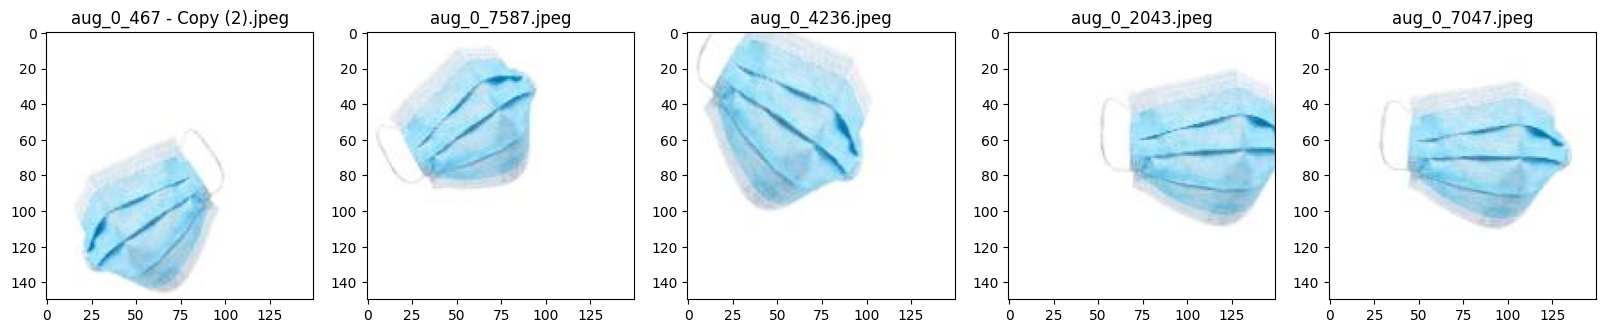

In [ ]:
# Display random images from 'Sline bottles' folder
glass_folder = '/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Mask_Infectious'
plt.figure(figsize=(20, 20))
for i in range(5):
    file = random.choice(os.listdir(glass_folder))
    image_path = os.path.join(glass_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1, 5, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

### Training Model

In [ ]:
data_dir = '/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset'

In [ ]:
# Load a model
model = YOLO("yolov8m-cls.pt") # load a pretained model
# train the model
results = model.train(data=data_dir, epochs=15, imgsz=256)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset, epochs=15, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train... 1971 images, 0 corrupt: 100%|██████████| 1971/1971 [15:25<00:00,  2.13it/s]


train: New cache created: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train.cache


val: Scanning /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val... 385 images, 0 corrupt: 100%|██████████| 385/385 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155528_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155529.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155529_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155530.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155530_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155531.jpg: corrupt JPEG restored and saved
v

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train5
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/15      1.16G        2.1         16        256:   5%|▍         | 6/124 [00:05<00:59,  1.99it/s]


100%|██████████| 755k/755k [00:00<00:00, 37.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [01:51<00:00,  8.58s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:17<00:00,  1.37s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15      1.29G   0.009181          3        256: 100%|██████████| 124/124 [01:47<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.15s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15      1.15G   0.005403          3        256: 100%|██████████| 124/124 [01:50<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15      1.14G   0.007432          3        256: 100%|██████████| 124/124 [01:50<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15      1.15G   0.003251          3        256: 100%|██████████| 124/124 [01:47<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15      1.14G   0.005307          3        256: 100%|██████████| 124/124 [01:46<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15      1.15G   0.003607          3        256: 100%|██████████| 124/124 [01:47<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all          1          1



15 epochs completed in 0.582 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 31.7MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15772904 parameters, 0 gradients, 41.6 GFLOPs
train: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train... found 1971 images in 8 classes ✅ 
val: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val... found 385 images in 8 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all          1          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5
Results saved to runs/classify/train5


In [ ]:
# Load a model
model = YOLO("yolov8m-cls.pt") # load a pretained model
# train the model
results = model.train(data=data_dir, epochs=30, imgsz=64)

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset, epochs=30, time=None, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 90.3MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train... 2017 images, 0 corrupt: 100%|██████████| 2017/2017 [13:18<00:00,  2.53it/s]

train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155319.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155327.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155328.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155328_01.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155329.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train/Saline-Bottles_Non-Hazardous/IMG20200208155329_01.jpg: corrupt JPEG

train: New cache created: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train.cache


val: Scanning /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val... 385 images, 0 corrupt: 100%|██████████| 385/385 [02:37<00:00,  2.44it/s]

val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155528_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155529.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155529_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155530.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155530_01.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155531.jpg: corrupt JPEG restored and saved
v

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30     0.682G      2.125         16         64:   3%|▎         | 4/127 [00:02<00:51,  2.38it/s]

       1/30     0.684G      2.112         16         64:   5%|▍         | 6/127 [00:03<00:59,  2.02it/s]
100%|██████████| 755k/755k [00:00<00:00, 27.7MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30     0.686G    0.04604          1         64: 100%|██████████| 127/127 [01:44<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30     0.895G    0.04201          1         64: 100%|██████████| 127/127 [01:45<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.686G    0.05831          1         64: 100%|██████████| 127/127 [01:45<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.686G    0.05053          1         64: 100%|██████████| 127/127 [01:41<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.686G    0.05201          1         64: 100%|██████████| 127/127 [01:46<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.686G    0.03412          1         64: 100%|██████████| 127/127 [01:44<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.895G     0.0399          1         64: 100%|██████████| 127/127 [01:46<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.686G    0.03613          1         64: 100%|██████████| 127/127 [01:43<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.686G     0.0315          1         64: 100%|██████████| 127/127 [01:43<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.895G    0.03316          1         64: 100%|██████████| 127/127 [01:45<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.686G    0.03124          1         64: 100%|██████████| 127/127 [01:42<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30     0.895G    0.03068          1         64: 100%|██████████| 127/127 [01:46<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.895G    0.04316          1         64: 100%|██████████| 127/127 [01:44<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.895G    0.02527          1         64: 100%|██████████| 127/127 [01:45<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.686G    0.03868          1         64: 100%|██████████| 127/127 [01:46<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.686G    0.03222          1         64: 100%|██████████| 127/127 [01:43<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.686G    0.02265          1         64: 100%|██████████| 127/127 [01:40<00:00,  1.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.686G    0.02499          1         64: 100%|██████████| 127/127 [01:43<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.895G    0.02157          1         64: 100%|██████████| 127/127 [01:46<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.895G    0.02333          1         64: 100%|██████████| 127/127 [01:41<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.895G    0.02453          1         64: 100%|██████████| 127/127 [01:41<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all      0.971          1



30 epochs completed in 1.012 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 31.7MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15772904 parameters, 0 gradients, 41.6 GFLOPs
train: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/train... found 2017 images in 8 classes ✅ 
val: /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val... found 385 images in 8 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]


                   all      0.997          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
Results saved to runs/classify/train3


In [ ]:
!ls /content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train3

args.yaml					   train_batch1.jpg	  val_batch1_labels.jpg
confusion_matrix_normalized.png			   train_batch2540.jpg	  val_batch1_pred.jpg
confusion_matrix.png				   train_batch2541.jpg	  val_batch2_labels.jpg
events.out.tfevents.1707623696.944b697f6606.478.0  train_batch2542.jpg	  val_batch2_pred.jpg
results.csv					   train_batch2.jpg	  weights
results.png					   val_batch0_labels.jpg
train_batch0.jpg				   val_batch0_pred.jpg


In [ ]:
!ls /content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4

args.yaml					   train_batch1.jpg	  val_batch1_labels.jpg
confusion_matrix_normalized.png			   train_batch2.jpg	  val_batch1_pred.jpg
confusion_matrix.png				   train_batch635.jpg	  val_batch2_labels.jpg
events.out.tfevents.1707742499.796e046ef868.503.0  train_batch636.jpg	  val_batch2_pred.jpg
results.csv					   train_batch637.jpg	  weights
results.png					   val_batch0_labels.jpg
train_batch0.jpg				   val_batch0_pred.jpg


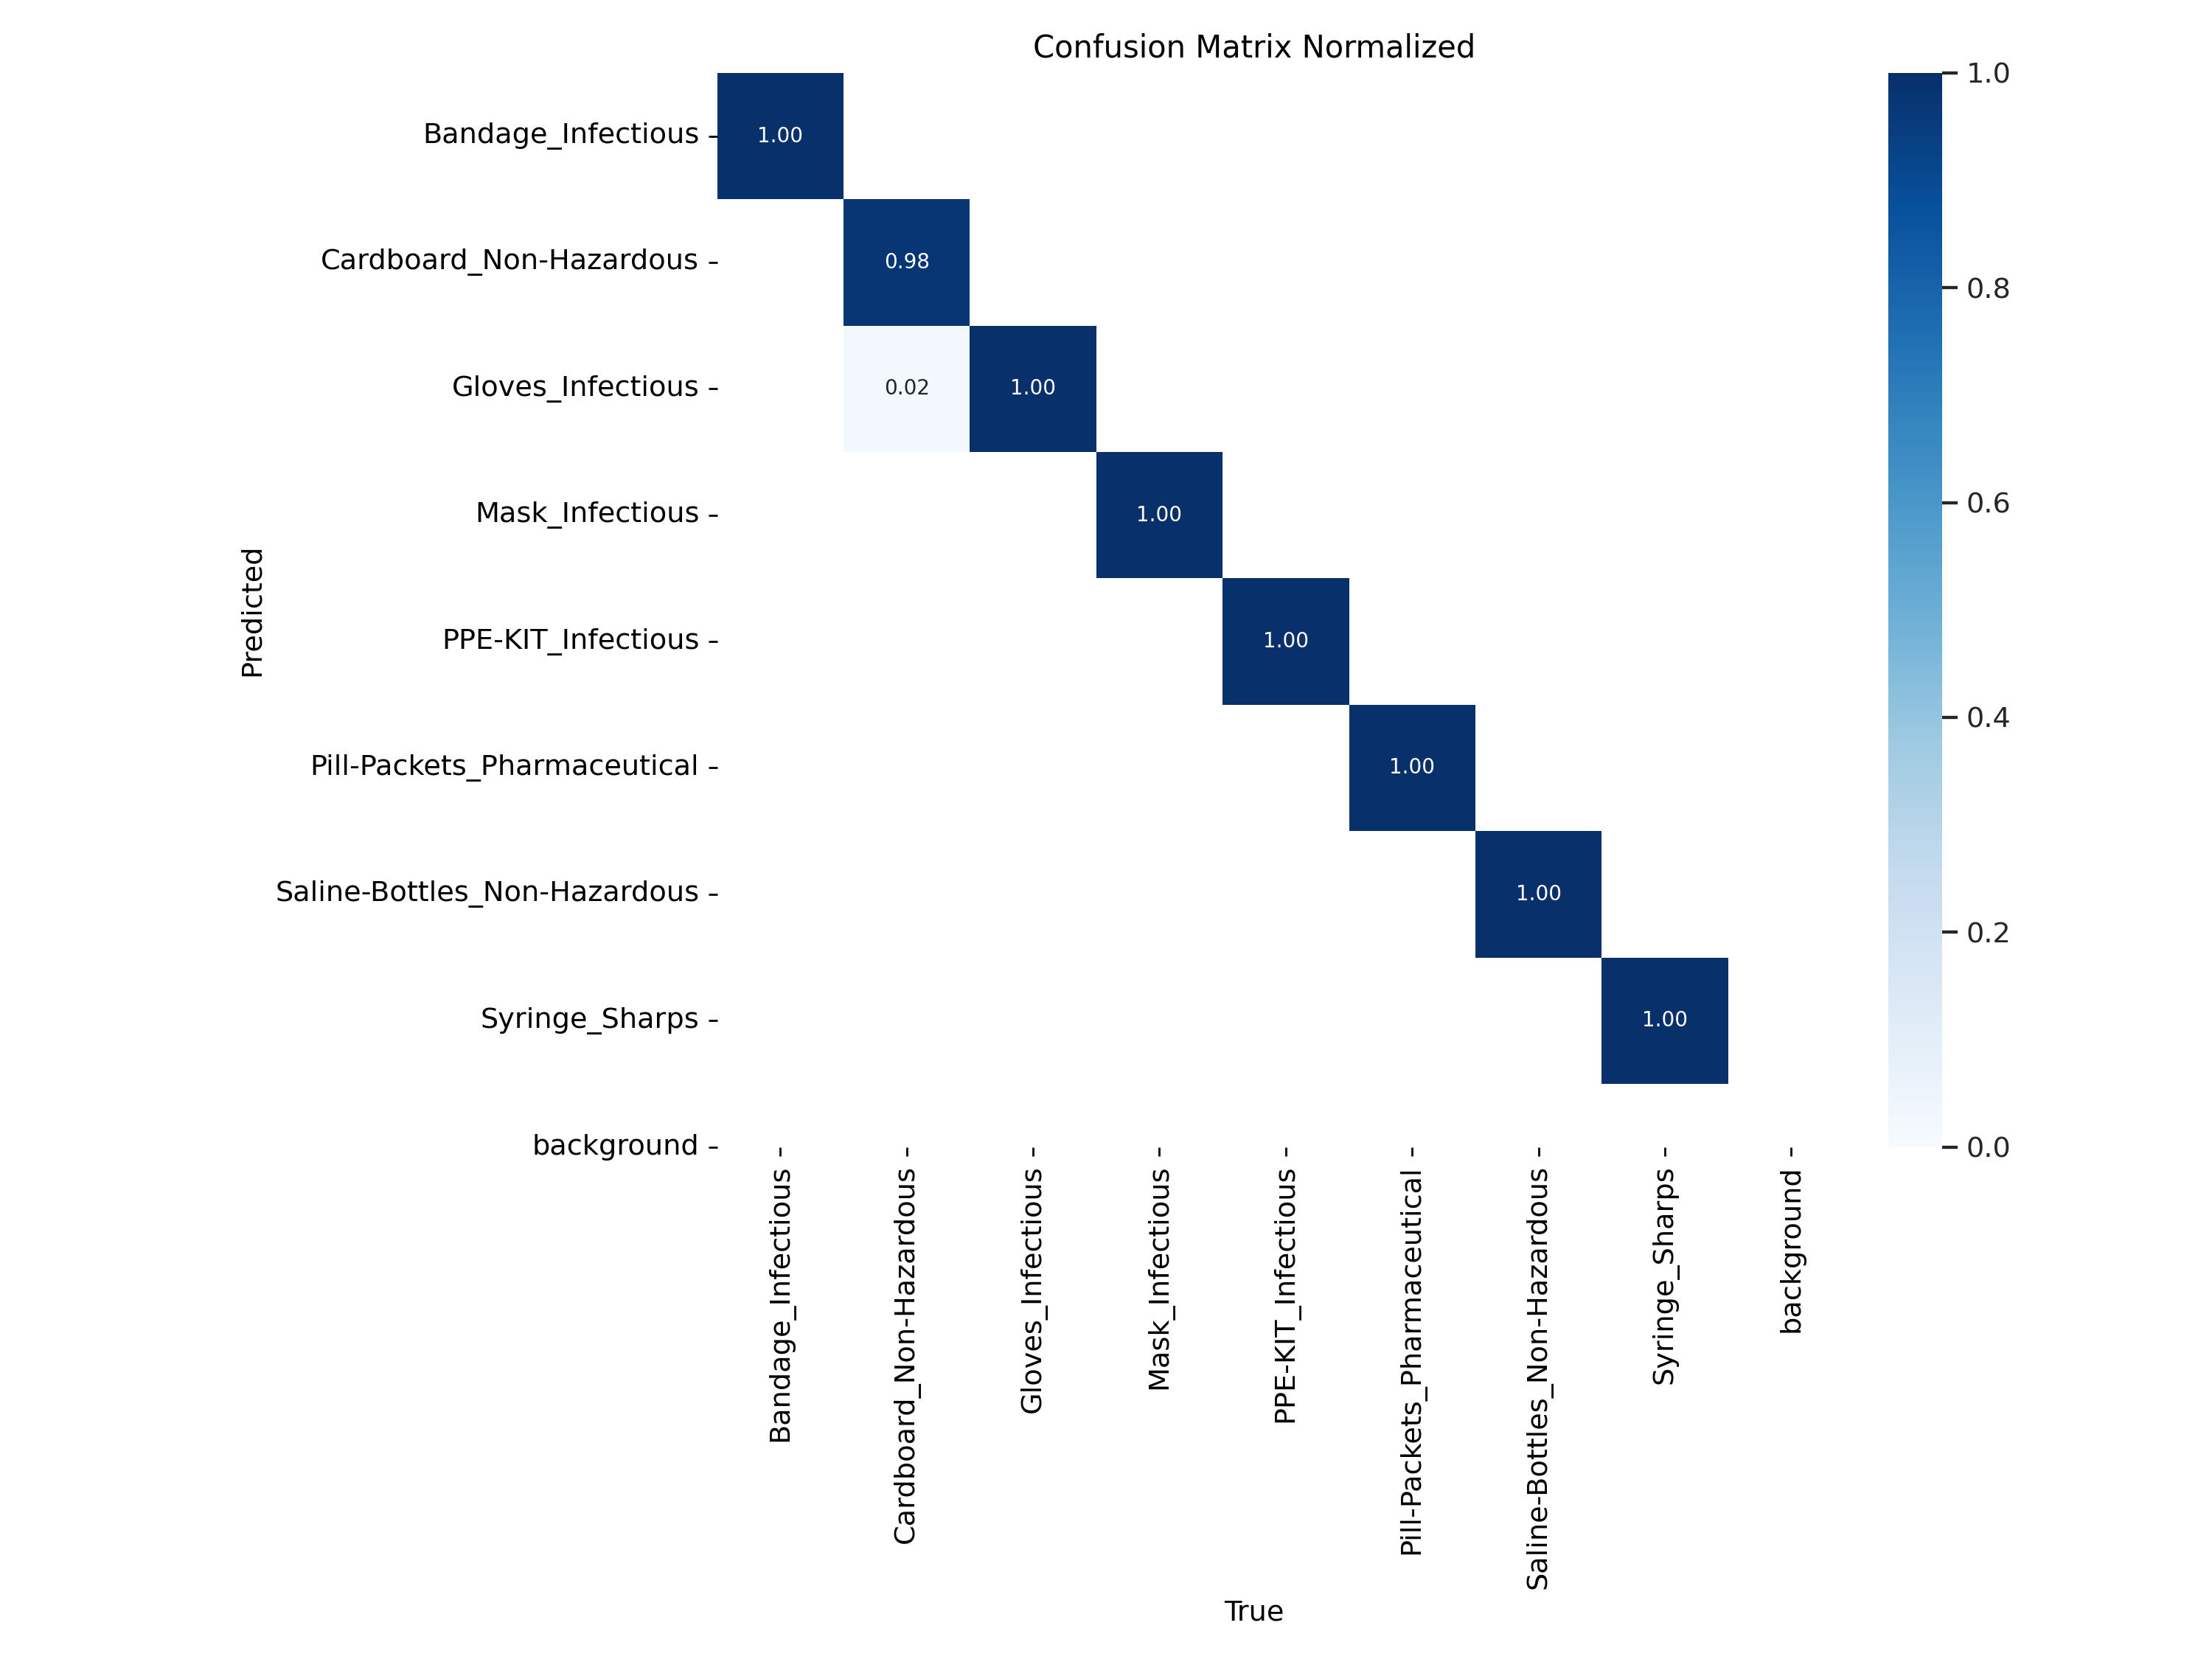

In [ ]:
Image(filename='/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train3/confusion_matrix_normalized.png',width=1100)

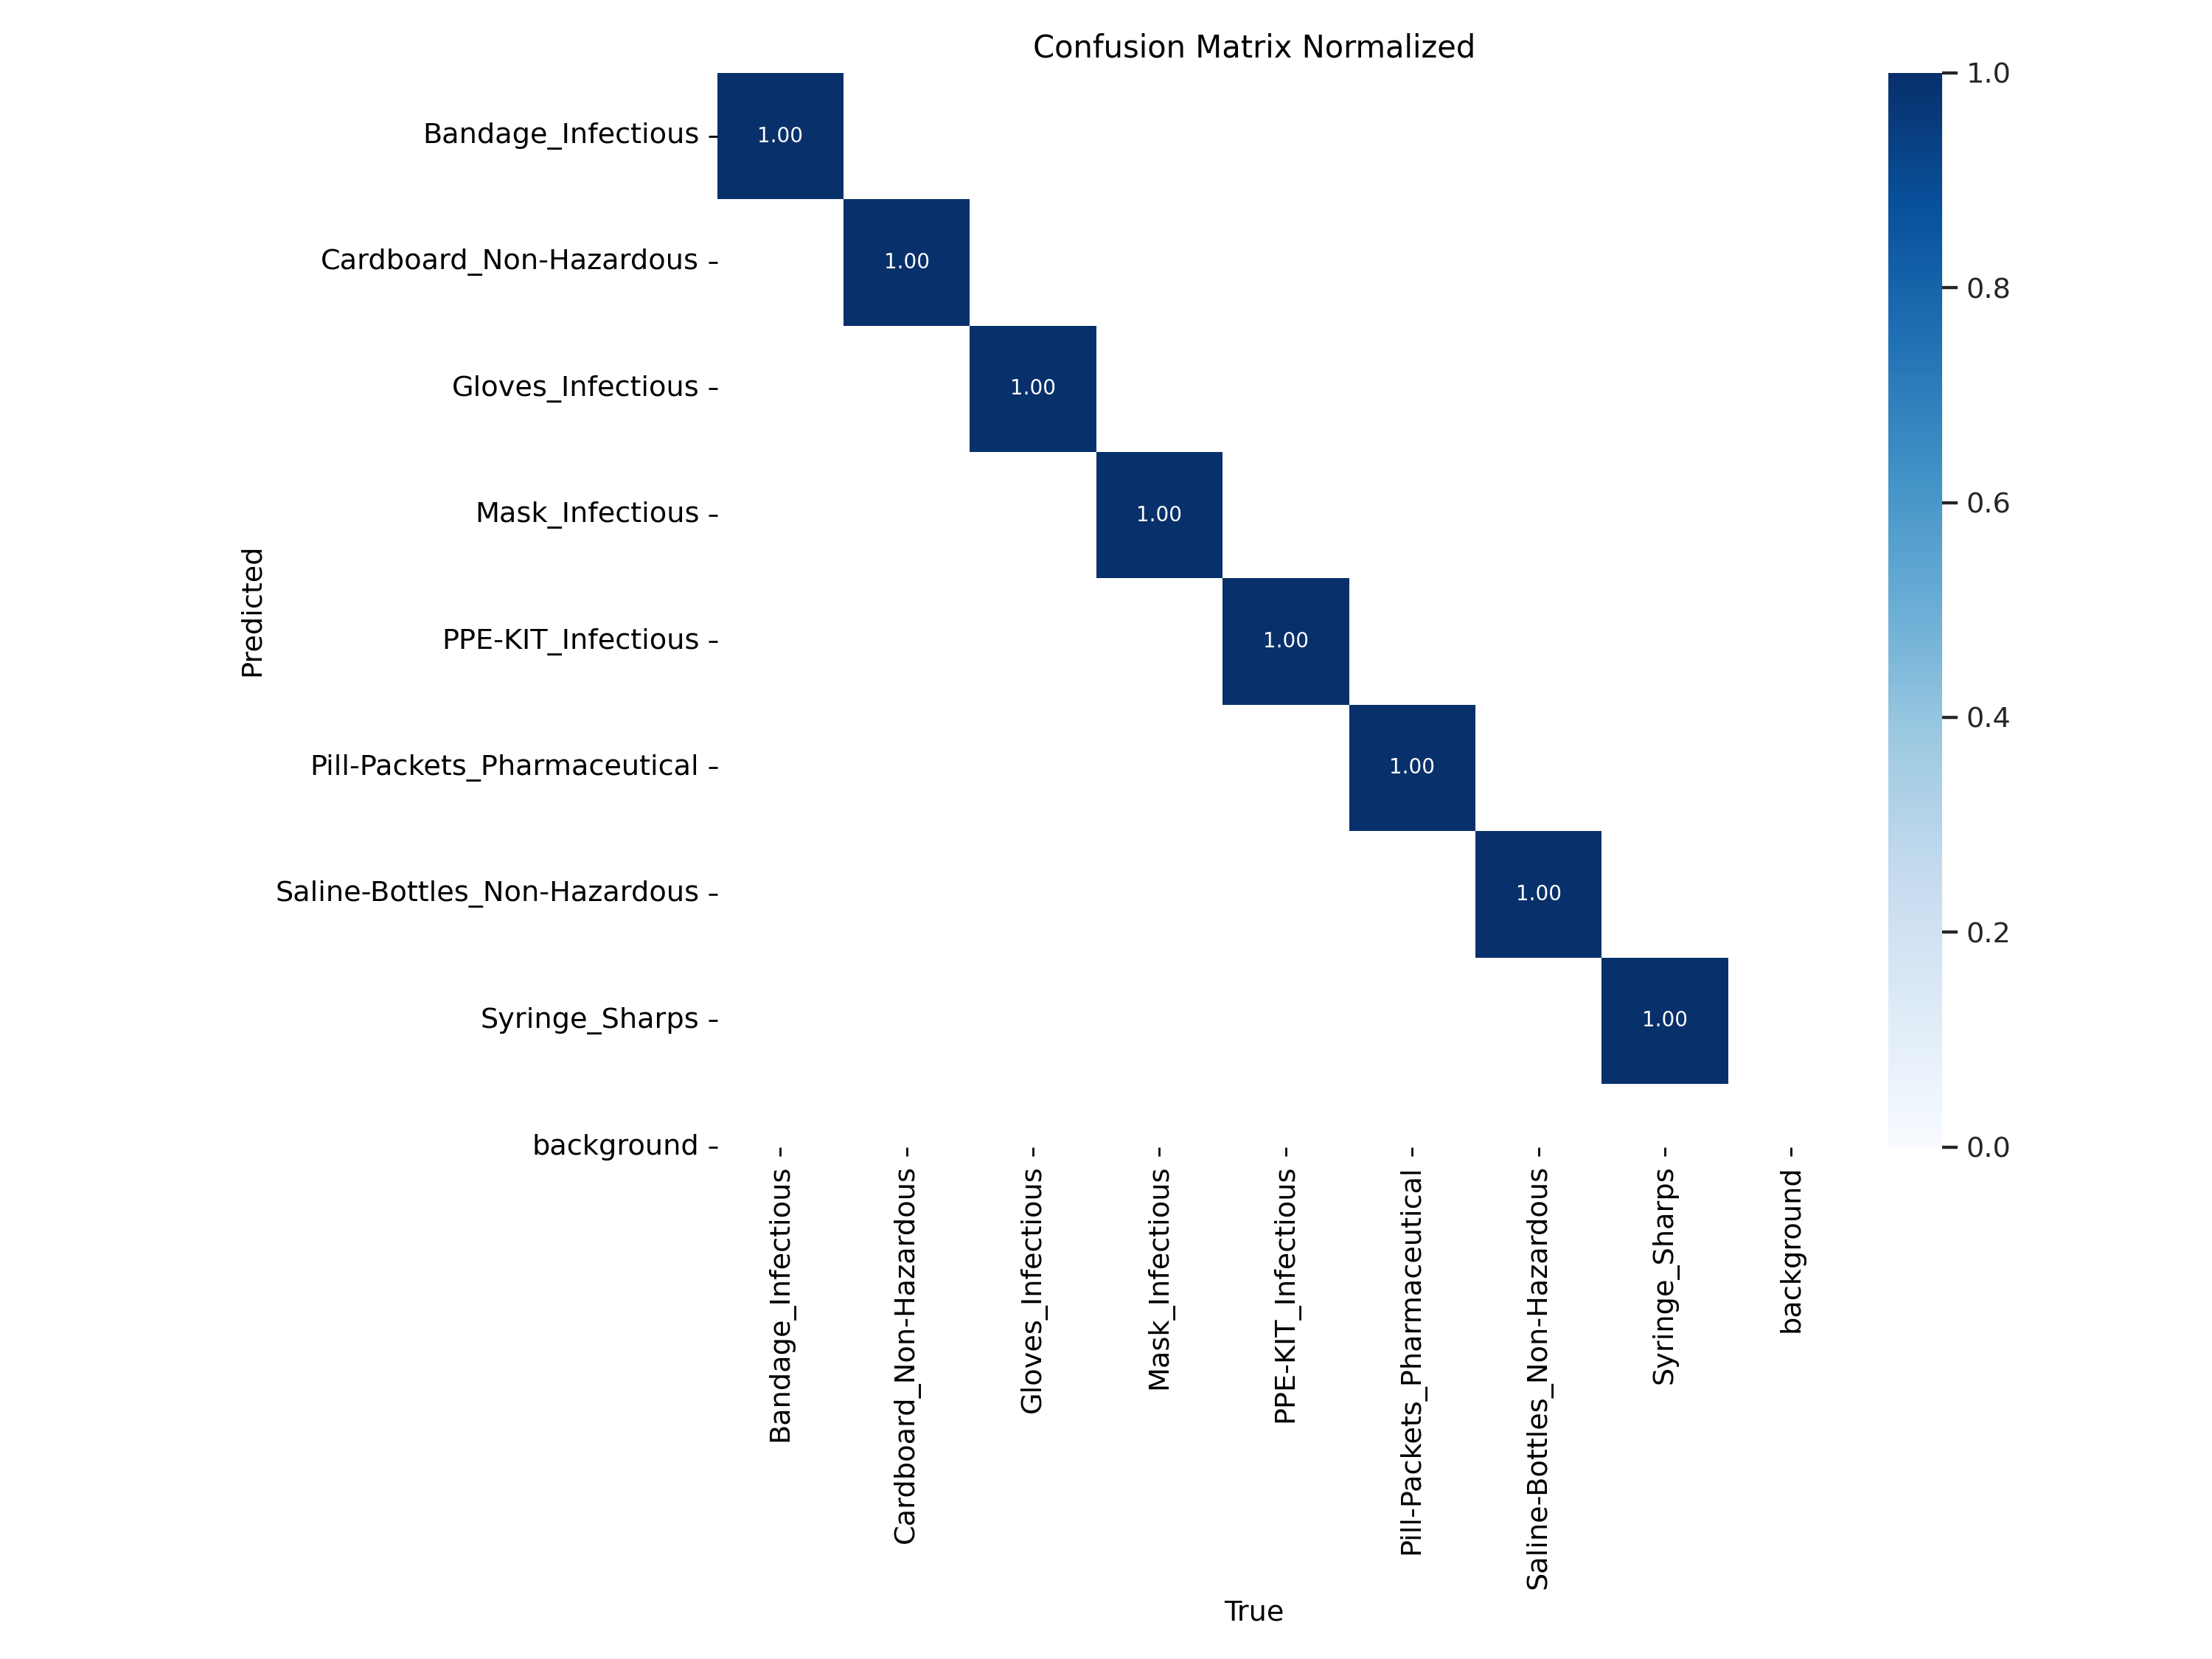

In [ ]:
Image(filename='/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/confusion_matrix_normalized.png',width=1100)

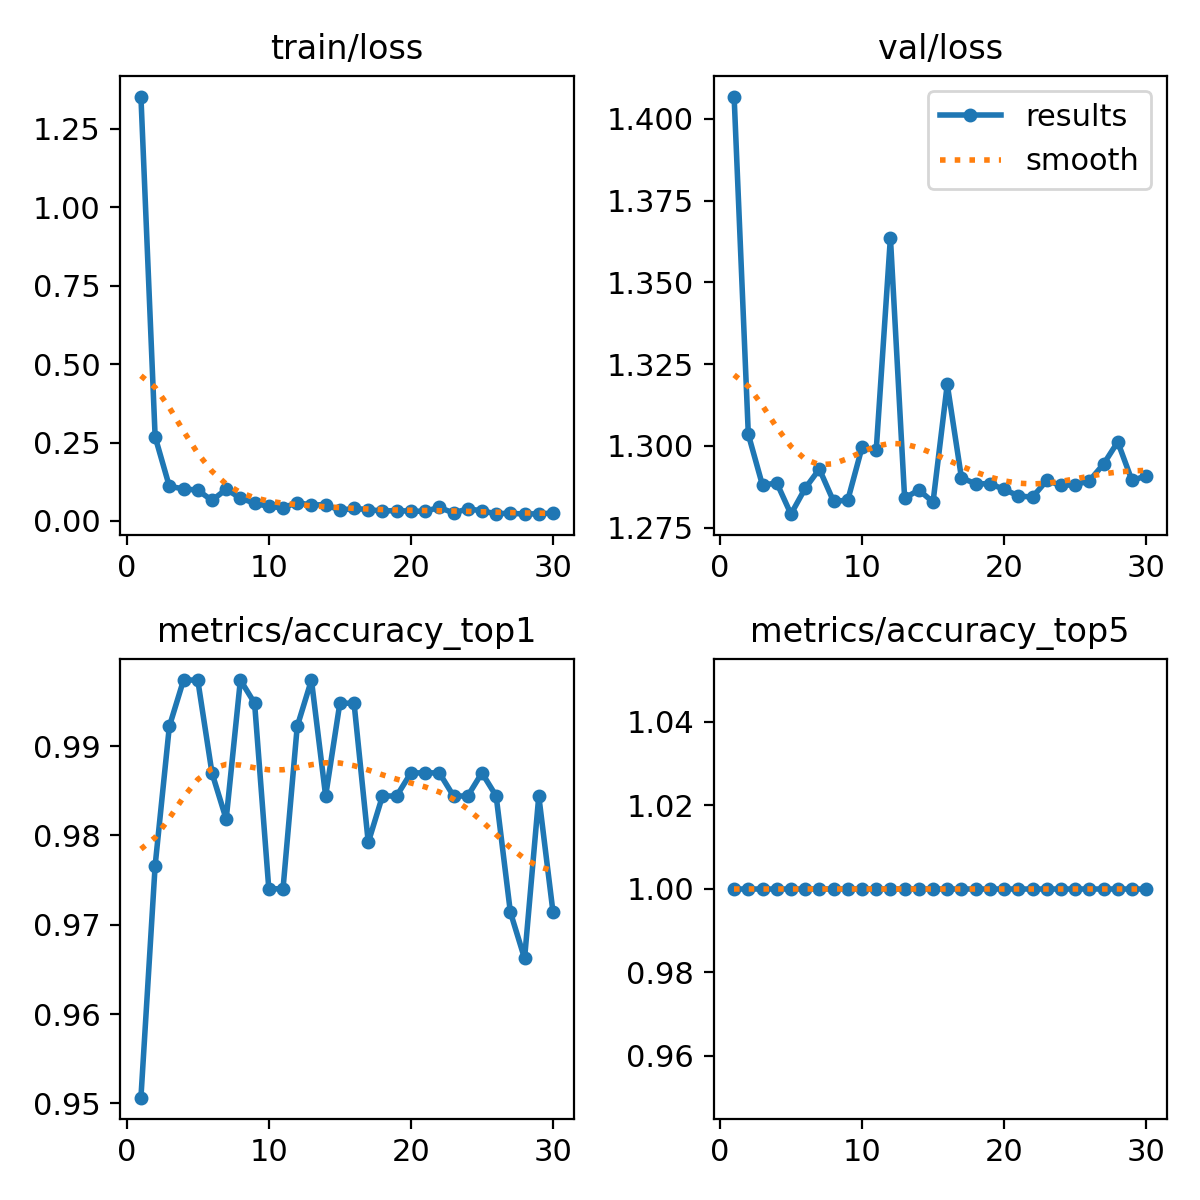

In [ ]:
Image(filename='/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train3/results.png',width=900, height=600)

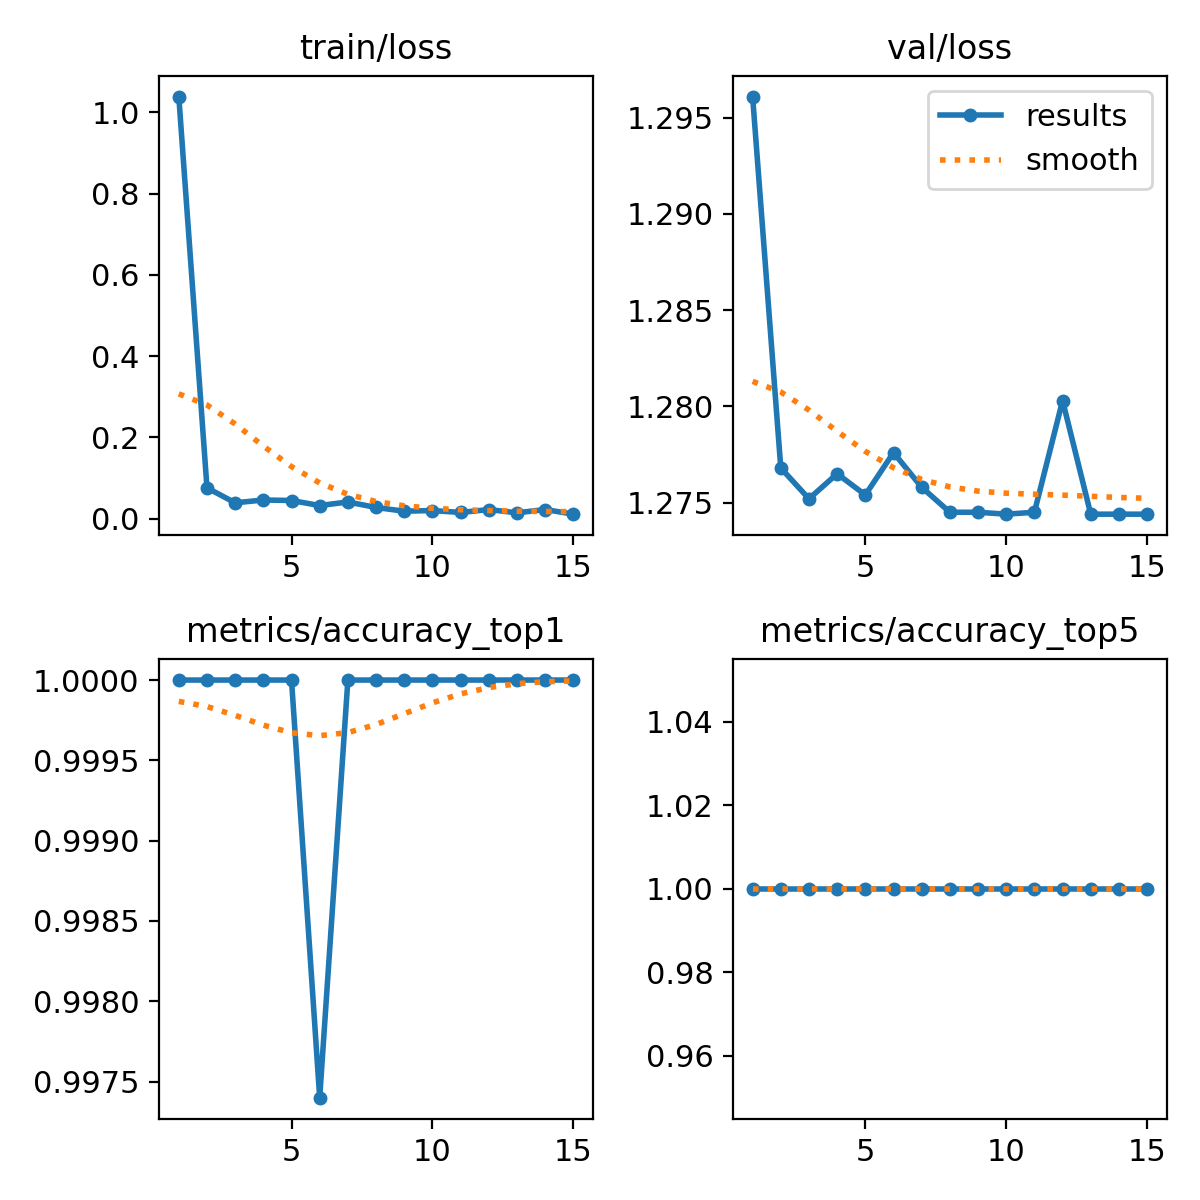

In [ ]:
Image(filename='/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/results.png',width=900, height=600)

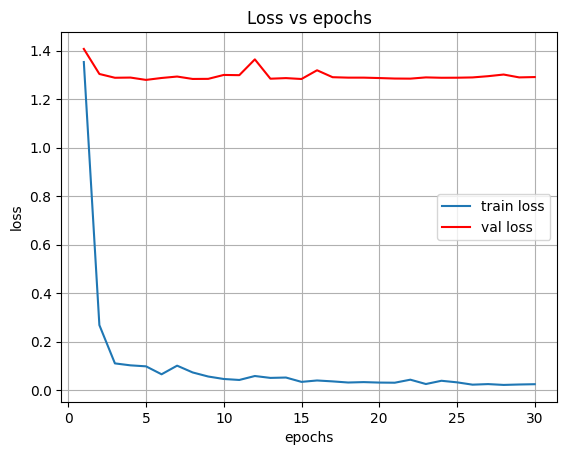

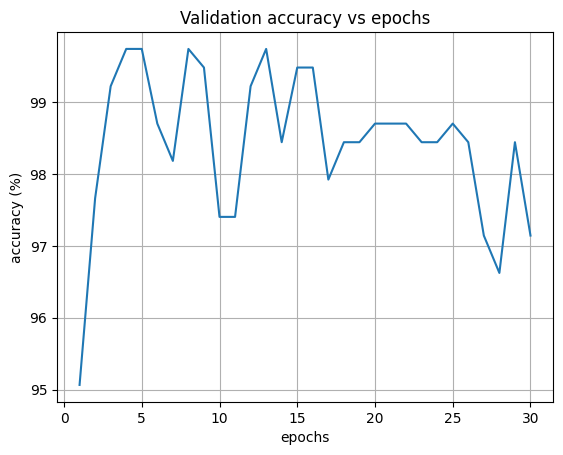

In [ ]:
results_path = '/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train3/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

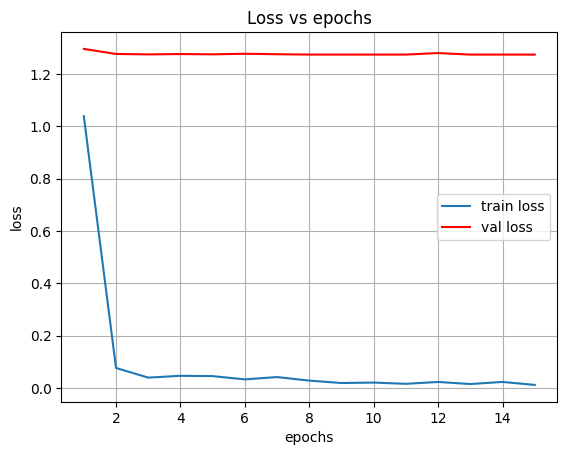

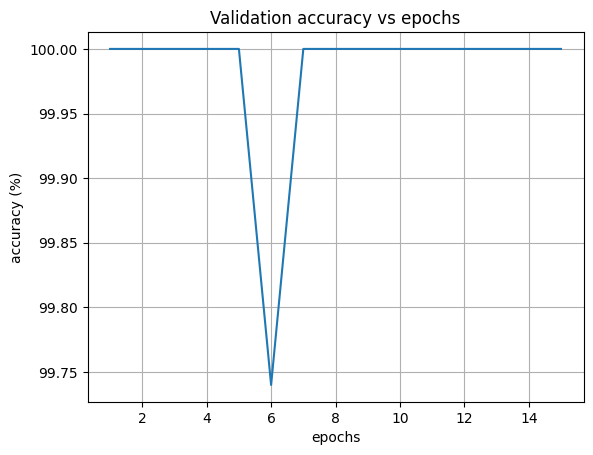

In [ ]:
results_path = '/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

### Training Batch Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

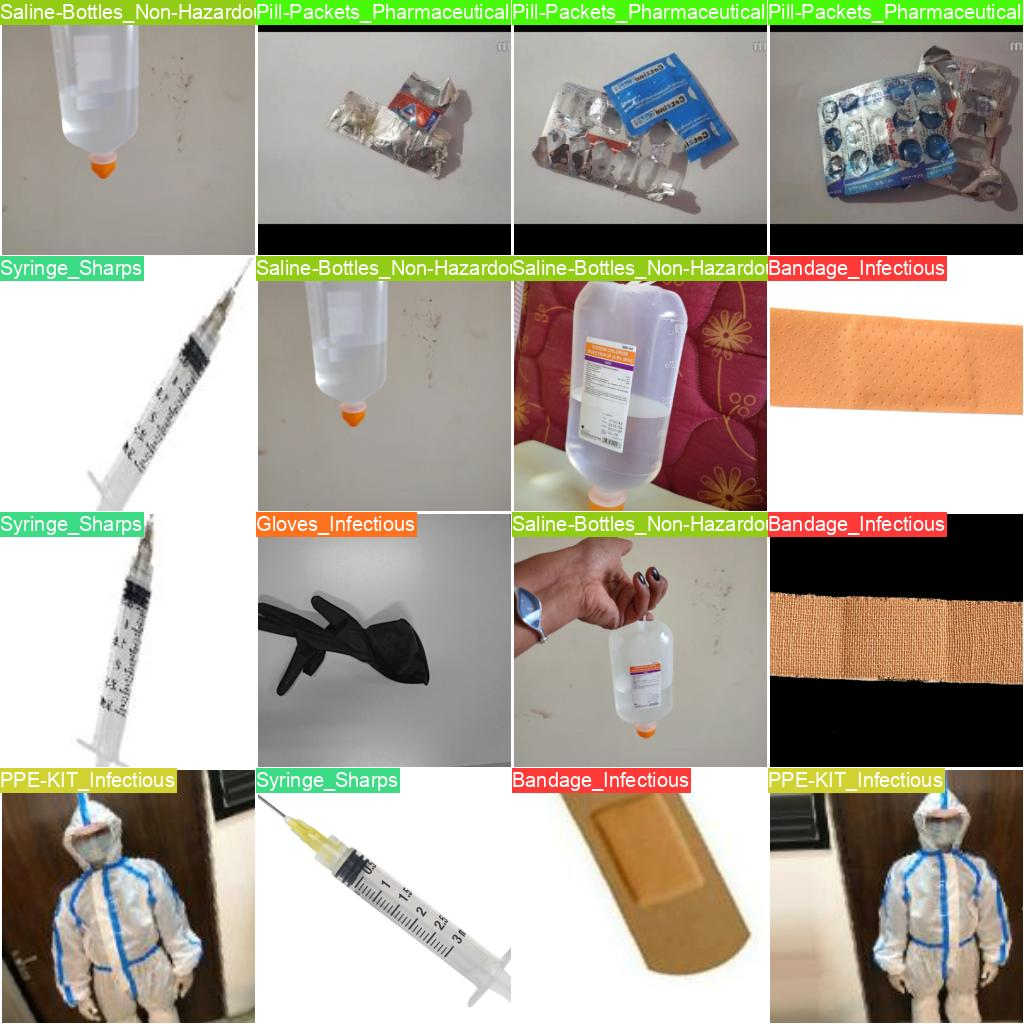

In [ ]:
Image(filename='/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/val_batch2_pred.jpg',width=500, height=500)

In [ ]:
# from ultralytics import YOLO
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt')  # load a custom model
results = model('/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155528_01.jpg')  # predict on an image

names_dict = results[0].names
probs = results[0].probs.data.tolist()

# print(names_dict)
# print(probs)
# print(names_dict[np.argmax(probs)])

print("Predicted Waste Item Class : " + names_dict[np.argmax(probs)].split('_')[0])
print("Predicted Waste Category : " + names_dict[np.argmax(probs)].split('_')[1])


image 1/1 /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Saline-Bottles_Non-Hazardous/IMG20200208155528_01.jpg: 256x256 Saline-Bottles_Non-Hazardous 1.00, Syringe_Sharps 0.00, Cardboard_Non-Hazardous 0.00, Pill-Packets_Pharmaceutical 0.00, Gloves_Infectious 0.00, 6.6ms
Speed: 154.6ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Predicted Waste Item Class : Saline-Bottles
Predicted Waste Category : Non-Hazardous


In [ ]:
model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt')  # load a custom model
results = model('/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Gloves_Infectious/1671037053626.jpeg')  # predict on an image

names_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Predicted Waste Item Class : " + names_dict[np.argmax(probs)].split('_')[0])
print("Predicted Waste Category : " + names_dict[np.argmax(probs)].split('_')[1])


image 1/1 /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Gloves_Infectious/1671037053626.jpeg: 256x256 Gloves_Infectious 1.00, Syringe_Sharps 0.00, Saline-Bottles_Non-Hazardous 0.00, PPE-KIT_Infectious 0.00, Mask_Infectious 0.00, 6.5ms
Speed: 19.8ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Predicted Waste Item Class : Gloves
Predicted Waste Category : Infectious


In [ ]:
model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt')  # load a custom model
results = model('/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Bandage_Infectious/Image_1 - Copy (2).png')  # predict on an image

names_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Predicted Waste Item Class : " + names_dict[np.argmax(probs)].split('_')[0])
print("Predicted Waste Category : " + names_dict[np.argmax(probs)].split('_')[1])


image 1/1 /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Bandage_Infectious/Image_1 - Copy (2).png: 256x256 Bandage_Infectious 1.00, Syringe_Sharps 0.00, Cardboard_Non-Hazardous 0.00, Mask_Infectious 0.00, Pill-Packets_Pharmaceutical 0.00, 6.6ms
Speed: 8.1ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)
Predicted Waste Item Class : Bandage
Predicted Waste Category : Infectious


In [ ]:
model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt')  # load a custom model
results = model('/content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Cardboard_Non-Hazardous/cardboard258.jpg')  # predict on an image

names_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Predicted Waste Item Class : " + names_dict[np.argmax(probs)].split('_')[0])
print("Predicted Waste Category : " + names_dict[np.argmax(probs)].split('_')[1])


image 1/1 /content/gdrive/MyDrive/MedicalWasteClassification/MWDataset/val/Cardboard_Non-Hazardous/cardboard258.jpg: 256x256 Cardboard_Non-Hazardous 1.00, Syringe_Sharps 0.00, Mask_Infectious 0.00, PPE-KIT_Infectious 0.00, Pill-Packets_Pharmaceutical 0.00, 6.5ms
Speed: 4.8ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)
Predicted Waste Item Class : Cardboard
Predicted Waste Category : Non-Hazardous


<IPython.core.display.Javascript object>

Saved to photo.jpg

image 1/1 /content/gdrive/MyDrive/MedicalWasteClassification/photo.jpg: 64x64 Saline-Bottles_Non-Hazardous 1.00, Gloves_Infectious 0.00, Cardboard_Non-Hazardous 0.00, Pill-Packets_Pharmaceutical 0.00, PPE-KIT_Infectious 0.00, 5.2ms
Speed: 3.1ms preprocess, 5.2ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)
Predicted Waste Item Class: Saline-Bottles
Predicted Waste Category: Non-Hazardous


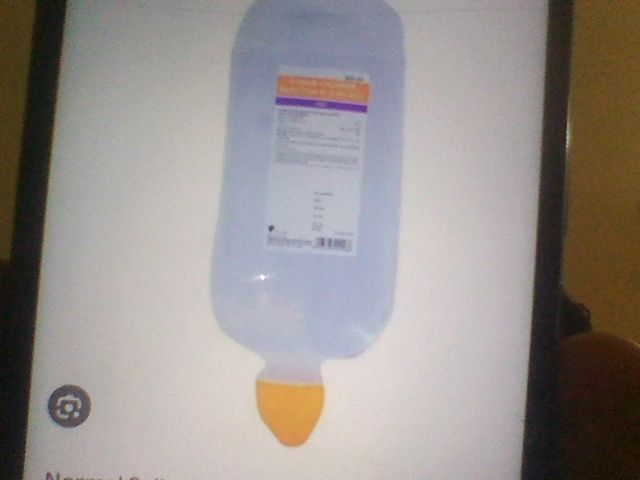

In [ ]:
from PIL import Image
from IPython.display import Image as IPImage

# Function to capture photo and perform waste classification
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the video to the specified dimensions for better visualization
            video.width = 256;
            video.height = 256;

            // Wait for the 'Capture' button to be clicked
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train3/weights/best.pt')  # load a custom model
# Function to make predictions
def make_prediction(image_path):

    image = Image.open(image_path)
    results = model(image_path)  # predict on an image

    names_dict = results[0].names
    probs = results[0].probs.data.tolist()

    predicted_item_class = names_dict[np.argmax(probs)].split('_')[0]
    predicted_category = names_dict[np.argmax(probs)].split('_')[1]

    return predicted_item_class, predicted_category

# Capture photo and perform waste classification
filename = take_photo()
print('Saved to {}'.format(filename))

# Make prediction
predicted_item_class, predicted_category = make_prediction(filename)
print('Predicted Waste Item Class:', predicted_item_class)
print('Predicted Waste Category:', predicted_category)

# Display the captured image
display(IPImage(filename))

In [ ]:
from google.colab import files
from PIL import Image as PILImage
import numpy as np

model = YOLO('/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt')  # load a custom model
# Function to make predictions
def make_prediction(image_path):

    image = PILImage.open(image_path)
    results = model(image_path)  # predict on an image

    names_dict = results[0].names
    probs = results[0].probs.data.tolist()

    predicted_item_class = names_dict[np.argmax(probs)].split('_')[0]
    predicted_category = names_dict[np.argmax(probs)].split('_')[1]

    return predicted_item_class, predicted_category

# take photo and perform waste classification
from google.colab import files
from IPython.display import Image

uploaded = files.upload()
image_filename = list(uploaded.keys())[0]

print('Saved to {}'.format(image_filename))

# Make prediction
predicted_item_class, predicted_category = make_prediction(image_filename)
print()
print('Predicted Waste Item Class:', predicted_item_class)
print('Predicted Waste Category:', predicted_category)
print()

# Display the captured image
# display(IPImage(image_filename))
Image(image_filename)

KeyboardInterrupt: 

In [ ]:
!pip install streamlit -q

In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
from ultralytics import YOLO
from io import BytesIO

# Initialize session state
if "page" not in st.session_state:
    st.session_state.page = "Home"

# Load the YOLO model with pre-trained weights
model_path = '/content/gdrive/MyDrive/MedicalWasteClassification/runs/classify/train4/weights/best.pt'
model = YOLO(model_path)

# Define the function to make predictions
def make_predictions(image_data):
    image = Image.open(BytesIO(image_data))
    results = model(image)
    names_dict = results[0].names
    probs = results[0].probs.data.tolist()
    predicted_item_class = names_dict[np.argmax(probs)].split('_')[0]
    predicted_category = names_dict[np.argmax(probs)].split('_')[1]
    return image, predicted_item_class, predicted_category

# Define the function to capture photo and perform waste classification
def take_photo_and_classify():
    picture = st.camera_input("Take a picture")

    if picture:
        # Make prediction
        image, predicted_item_class, predicted_category = make_predictions(picture.getvalue())

        # Display the captured image and prediction
        st.image(image, caption='Captured Image')
        st.write('Predicted Waste Item Class:', predicted_item_class)
        st.write('Predicted Waste Category:', predicted_category)
    else:
        st.warning("No image captured.")

# Define the footer content
def sidebar_footer():
    st.sidebar.markdown("---")
    st.sidebar.markdown("<div style='text-align: center; font-size: 12px; font-family: Times New Roman; margin-bottom: 5px;'>Medical waste detection and classification</div>", unsafe_allow_html=True)
    st.sidebar.markdown("<div style='text-align: center; font-size: 12px; font-family: Times New Roman;'>Omkar Bhalerao | Srushti Bobe | Priyanka Adhav</div>", unsafe_allow_html=True)

#st.sidebar.markdown("<div style='text-align: center;'><title>Discover</title></div>", unsafe_allow_html=True)
st.sidebar.image("/content/gdrive/MyDrive/MedicalWasteClassification/side-unscreen (1).gif", use_column_width=True)

# Center-align sidebar content and add space after the line
st.sidebar.markdown("<div style='text-align: center; margin-bottom: 30px;'>"
                    "<b>Exploring pathways to innovation and knowledge.</b>"
                    "</div>", unsafe_allow_html=True)

nav_options = ["🏠 Home", "📝 Problem" , "🔧 Working", "📊 Classification", "👩‍💻 About"]
icons = ["➜", "➜", "➜", "➜", "➜"]
for option, icon in zip(nav_options, icons):
    if st.sidebar.button(f"{icon} {option}", key=option):
        st.session_state.page = option.split()[1]
sidebar_footer()

# Render the content based on the selected page
if st.session_state.page == "Home":
    st.markdown("<h1 style='text-align: center;'>Medical Waste Detection and Classification</h1>", unsafe_allow_html=True)
    st.write("<p style='text-align:center; font-family:Charmonman'><b>Empowering Health, Protecting Tomorrow: Innovating Medical Waste Detection and Classification</b></p>", unsafe_allow_html=True)
    st.image("/content/gdrive/MyDrive/MedicalWasteClassification/im1 (1).jpg", use_column_width=True)
    st.write("<p style='text-align:justify'>Efficient detection and meticulous classification of medical waste are paramount for safeguarding healthcare professionals, patients, and the environment. Spanning categories such as infectious, sharps, pharmaceutical, and hazardous waste, each demands precise handling and disposal protocols. Accurate identification and categorization empower healthcare facilities to segregate and manage waste streams adeptly, curbing the risk of contamination and ensuring unwavering adherence to regulatory mandates. Robust detection and classification systems not only mitigate potential health and environmental hazards but also exemplify a commitment to responsible medical waste management</p>", unsafe_allow_html=True)

elif st.session_state.page == "Problem":
    st.title("Problem Statement")
    st.write("<p style='text-align:justify'>Inadequate knowledge about medical waste types and management often leads people to dispose of their waste improperly, resulting in mixed garbage that poses challenges for waste collectors during sorting, especially when dealing with hazardous materials.</p>", unsafe_allow_html=True)
    st.image("/content/gdrive/MyDrive/MedicalWasteClassification/prob (1).gif",use_column_width=True)
    st.write("<p style='text-align:justify'>Our solution aims to address this issue by encouraging individuals to segregate their waste according to predefined classifications at the source. Our system facilitates waste classification, providing assistance to individuals who may not be familiar with waste types, thereby promoting proper waste management practices.</p>", unsafe_allow_html=True)


elif st.session_state.page == "Working":
    st.title("System Overview")
    st.write("<p style='text-align:justify'>The outlined process describes a robust system for medical waste detection and classification, ensuring the efficient and safe management of medical waste.</p>", unsafe_allow_html=True)
    st.image("/content/gdrive/MyDrive/MedicalWasteClassification/Pastel (1).gif")
    st.write("<p style='text-align:justify'>The process of medical waste detection and classification initiates with the Input stage, where an image is acquired either through a camera capture or by uploading an existing image file. Once the image is acquired, it proceeds to the Upload phase, where it is transmitted to the system for further analysis. Upon reaching the Detect Image stage, the YOLOv8 object detection algorithm is deployed. YOLOv8 meticulously scrutinizes the image, identifying various objects present within it.</p>", unsafe_allow_html=True)
    st.write("<p style='text-align:justify'>Upon detection, the system classifies these items into four distinct categories: Infectious, Pharmaceutical, Sharps, and Non-Hazardous waste. Specifically:.</p>", unsafe_allow_html=True)

    # List of items
    items = [
        "Gloves are classified as Infectious waste.",
        "Pill Packets fall under the Pharmaceutical category.",
        "Masks are categorized as Infectious waste.",
        "Syringes are identified as Sharps.",
        "Saline Bottles are classified as Non-Hazardous waste.",
        "PPE Kits are categorized as Infectious waste.",
        "Bandages are classified as Infectious waste.",
        "Cardboard is identified as Non-Hazardous waste."
    ]

    # Create an unordered list
    st.write("<ul>", unsafe_allow_html=True)

    # Add list items
    for item in items:
        st.write(f"<li>{item}</li>", unsafe_allow_html=True)

    # Close the unordered list
    st.write("</ul>", unsafe_allow_html=True)

    st.write("<p style='text-align:justify'>This classification enables proper handling, disposal, or treatment based on the hazard level and type of medical waste identified from the input image. By accurately detecting and sorting various types of waste materials using YOLOv8, the system facilitates the efficient and safe management of medical waste, ultimately contributing to improved healthcare waste management practices.</p>", unsafe_allow_html=True)

elif st.session_state.page == "Classification":
    st.markdown("<h1 style='text-align: center;'>Medical Waste Detection and Classification</h1>", unsafe_allow_html=True)
    st.image("/content/gdrive/MyDrive/MedicalWasteClassification/videocon-unscreen (1).gif", use_column_width=True)

    # Streamlit app section for capturing photo and making predictions
    st.markdown("<h4 style='text-align: center;'>Take a Picture for Prediction</h4>", unsafe_allow_html=True)
    st.write(" ➜ Take Picture")
    take_photo_and_classify()


    # Streamlit app section for uploading an image and making predictions
    st.markdown("<h4 style='text-align: center;'>Upload an Image for Prediction</h4>", unsafe_allow_html=True)
    st.write(" ➜ Select Your Image")
    uploaded_file = st.file_uploader("Choose a file", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Save the uploaded file
        image_path = 'uploaded_image.jpg'
        with open(image_path, 'wb') as f:
            f.write(uploaded_file.getvalue())

        st.success('File uploaded and saved to {}'.format(image_path))

        # Read the uploaded file as bytes
        image_bytes = uploaded_file.read()

        # Make prediction
        image, predicted_item_class, predicted_category = make_predictions(image_bytes)

        # Display the prediction
        st.subheader('Prediction:')
        st.write('Predicted Waste Item Class:', predicted_item_class)
        st.write('Predicted Waste Category:', predicted_category)

        # Display the uploaded image
        st.subheader('Uploaded Image:')
        st.image(image)




elif st.session_state.page == "About":
    st.title("About Us")

    st.write("<p style='text-align:justify'>We are a team of enthusiastic students from JSPM's Rajarshi Shahu College of Engineering, Pune, pursuing our Bachelor of Technology (B.Tech) in Information Technology. Passionate about technology and innovation, we come together to explore and create solutions that make a positive impact on the world around us.</p>", unsafe_allow_html=True)
    st.write(" ")
    # Set up a single-column layout for the first row
    col1, col2, col3 = st.columns(3)

    # Your photo and name
    with col1:
        st.image("/content/gdrive/MyDrive/MedicalWasteClassification/RBTL21IT010.jpg", use_column_width=True)
        st.write("<p style='text-align:center'>Omkar Bhalerao <br><a href='mailto:omkarbhalerao2002@gmail.com'>omkarbhalerao2002@gmail.com</a></p>", unsafe_allow_html=True)

    # Group member 1 photo and name
    with col2:
        st.image("/content/gdrive/MyDrive/MedicalWasteClassification/Srushti.jpg", use_column_width=True)
        st.write("<p style='text-align:center'>Srushti Bobe<br><a href='mailto:bobesrushti9146@gmail.com'>bobesrushti9146@gmail.com</a></p>", unsafe_allow_html=True)

    # Group member 2 photo and name
    with col3:
        st.image("/content/gdrive/MyDrive/MedicalWasteClassification/Priyanka.jpg", use_column_width=True)
        st.write("<p style='text-align:center'>Priyanka Adhav <br><a href='mailto:adhavpriyanka44@gmail.com'>adhavpriyanka44@gmail.com</a></p>", unsafe_allow_html=True)
        st.write(" ")

    st.write("<p style='text-align:justify'>As students of Rajarshi Shahu College of Engineering, we have access to state-of-the-art facilities and a dynamic learning environment that encourages innovation and collaboration. Our diverse backgrounds and experiences enrich our projects and enable us to approach problems from different perspectives.</p>", unsafe_allow_html=True)

    st.write("Please contact us for more information.")

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.170.32.230:8501

npx: installed 22 in 1.736s
your url is: https://small-windows-eat.loca.lt
/root/.npm/_npx/45000/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:37427 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/45000/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
